In [1]:
#1 Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import stat
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
#2 Import Data
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [5]:
fraud_data_ohe = pd.get_dummies(data=fraud_data, columns = ['Undergrad','Marital.Status','Urban'])
fraud_data_ohe

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

for i in range(len(fraud_data_ohe['Taxable.Income'])):
    if fraud_data_ohe['Taxable.Income'][i] <= 30000:
        fraud_data_ohe['Taxable.Income'][i] = 'risky'
    else:
        fraud_data_ohe['Taxable.Income'][i] = 'good'

In [8]:
X = fraud_data_ohe.drop(labels='Taxable.Income',axis=1)
y = fraud_data_ohe[['Taxable.Income']]

In [10]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [11]:
y

,Taxable.Income
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [14]:
#Training data 
X_train.shape , y_train.shape

((480, 9), (480, 1))

In [15]:
#Test Data
X_test.shape , y_test.shape

((120, 9), (120, 1))

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
#Training Data
y_train_pred = dt_model.predict(X_train)

In [19]:
#Test Data
y_test_pred = dt_model.predict(X_test)

In [21]:
#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix



In [22]:
#Training Data 
accuracy_score(y_train,y_train_pred)

1.0

In [23]:
confusion_matrix(y_train,y_train_pred)

array([[369,   0],
       [  0, 111]], dtype=int64)

In [24]:
#TEST DATA
accuracy_score(y_test,y_test_pred)

0.6416666666666667

In [25]:
confusion_matrix(y_test,y_test_pred)

array([[75, 32],
       [11,  2]], dtype=int64)

In [26]:
dt_model.feature_importances_

array([0.55643917, 0.2350852 , 0.03515124, 0.02224588, 0.03528267,
       0.02660911, 0.04633616, 0.01129289, 0.03155769])

In [27]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': dt_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [28]:
fi

,feature,importance
0,City.Population,0.556439
1,Work.Experience,0.235085
6,Marital.Status_Single,0.046336
4,Marital.Status_Divorced,0.035283
2,Undergrad_NO,0.035151
8,Urban_YES,0.031558
5,Marital.Status_Married,0.026609
3,Undergrad_YES,0.022246
7,Urban_NO,0.011293


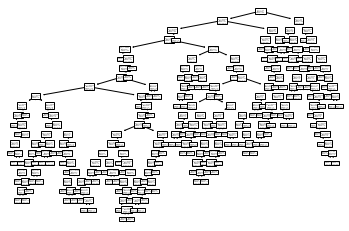

In [29]:
from sklearn import tree
tree.plot_tree(dt_model);


In [31]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [32]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [33]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [35]:
#model testing

In [34]:
#Training Data
y_train_pred2 = model_gini.predict(X_train)


In [36]:
#model evaluation

In [37]:
#Test Data
y_test_pred2 = model_gini.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [39]:
#Training Data 
accuracy_score(y_train,y_train_pred2)

0.8020833333333334

In [40]:
confusion_matrix(y_train,y_train_pred2)

array([[367,   2],
       [ 93,  18]], dtype=int64)

In [41]:
#TEST DATA
accuracy_score(y_test,y_test_pred2)

0.8416666666666667

In [42]:
confusion_matrix(y_test,y_test_pred2)

array([[101,   6],
       [ 13,   0]], dtype=int64)

In [43]:
model_gini.feature_importances_

array([0.57852335, 0.35134188, 0.        , 0.02825723, 0.        ,
       0.02569677, 0.01618076, 0.        , 0.        ])

In [44]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_gini.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [45]:
fi

,feature,importance
0,City.Population,0.578523
1,Work.Experience,0.351342
3,Undergrad_YES,0.028257
5,Marital.Status_Married,0.025697
6,Marital.Status_Single,0.016181
2,Undergrad_NO,0.000000
4,Marital.Status_Divorced,0.000000
7,Urban_NO,0.000000
8,Urban_YES,0.000000


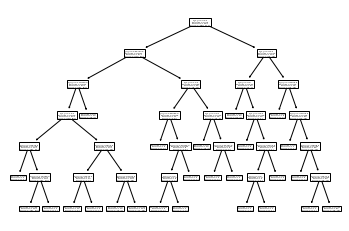

In [46]:
from sklearn import tree
tree.plot_tree(model_gini);